In [1]:
#importing libraries necessary to make all the calculations and plots
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

#making sure we do not lose the graphs
%matplotlib inline

<b> <font size = '6.5'> Surviving the Titanic crash - a short analysis </font size = '6.5'> </b>

<b> <font size='5'> 1. Introduction </b> </font size='5'>

The Titanic crash from 1912 is one of the most tragic and infamous catastrophes the civilized world has ever seen. The collision with an iceberg caused around 1,500 deaths. The rest of the passengers (around 600-700), however, survived the ordeal.

RMS Titanic was a gigantic vessel, enabling people from all walks of life to participate in a transatlantic journey. Not all people were equal when it came to the evacuation efforts. The purpose of this analysis is to look at the factors which might have influenced a passenger's survival chances based on their age, gender or social status.

<b><font size='5'>2. Data description</b></font size='5'>

In [2]:
#reading data
data = pd.read_csv('titanic_data.csv')
#how many records
print data.shape
#first five records
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data is loaded into a Pandas dataframe. The number of records (rows) is checked - we can see that the dataset does not cover all Titanic passengers, but only 891 of them.

Then, we can see the first five rows, which gives a rough idea as to what types of data will be dealt with. PassengerId, in the first column seems to be a unique passenger Id. On the other hand, the binary variable "Survived" is the most important point of the analysis, having 1 for people who survived the crash and 0 for people who unfortunately died. Pclass can be considered a proxy to the social status - there were three boarding classes on the ship, with poorer people going by 3rd class, and the richest by the first.

Passengers are also listed by their names, ages and sex. The variables SibSp and Parch give the number of siblings/spouses and parents/children present with a specific passenger on board. Apart from that, a ticket number, passenger fare, cabin number and port of embarkation can also be found.

<b><font size='5'>3. Analysis</b><font size='5'>

The following analysis will try to establish a relationship between survival chance and various characteristics of passengers.

First of all, it seems reasonable to differentiate between men and women. It might seem obvious that women were more likely to enter lifeboats than men, but it is worth checking if the difference (if there was any) was statistically significant. Secondly, it will be interesting to find out whether people were discriminated against because of their social status. If so, people travelling with the first class should be more likely to survive the catastrophe. Finally, age might have played an important role in determining who survived. Before beginning the analysis, I will check if there are any NaNs in the columns I want to include.

In [3]:
print "Missing data for passengers' IDs: " + str(data['PassengerId'].isnull().sum())
print "Missing data for column describing survival: " + str(data['Survived'].isnull().sum())
print "Missing data for travelling class " + str(data['Pclass'].isnull().sum())
print "Missing data for gender: " + str(data['Sex'].isnull().sum())
print "Missing data for age: " + str(data['Age'].isnull().sum())

Missing data for passengers' IDs: 0
Missing data for column describing survival: 0
Missing data for travelling class 0
Missing data for gender: 0
Missing data for age: 177


We can see that there is missing data only for the age variable. This will have to be taken into account while analyzing the variable at a later stage.

<b><font size='4'>3.1. 1d analysis of chosen variables </b></font size='4'>

The procedure below tries to cut down on the code needed to analyze single variables. It returns a count and proportion of passengers bearing certain characteristics. The variable 'PassengerId' was used to group the passengers, as each passenger has got a unique id, which is checked with the first line of code in the cell below. As the printed number matches the number of rows, we can be certain that each row begins with a different passenger ID.

In [4]:
print len(set(data['PassengerId']))

def counted(dataset,by,column):
    #counting percentages for a given category
    resultperc = dataset.groupby(by).size()/dataset.groupby(by).size().sum() 
    #the absolute number of counts
    resultnum = dataset.groupby(by).count()[column]
    #returns a concatenation of two series with column labels renamed
    return pd.concat([resultperc.round(2).rename("proportion"), resultnum.rename("count")], axis=1)

891


In [5]:
counted(data, 'Survived','PassengerId')

,proportion,count
Survived,,
0,0.62,549
1,0.38,342


The dependent variable has been analyzed first. As we can see, 62% of analyzed passengers (549 people) did not survive the catastrophe, whereas 342 (or 38%) survived. It is also clearly visible that the data seems to be correct, as there are no values other than '0' and '1'.

In [6]:
counted(data, 'Sex', 'PassengerId')

,proportion,count
Sex,,
female,0.35,314
male,0.65,577


As for the split by sex, we can see that there were more men than women among Titanic passengers. Females amounted to over 35% of all passengers, whereas males made almost 65%.

In [7]:
prop = counted(data, 'Pclass', 'PassengerId')
prop

,proportion,count
Pclass,,
1,0.24,216
2,0.21,184
3,0.55,491


Another variable that will be later used for analysis is the Pclass, which can be considered a proxy to social status of passengers. Over half of the passengers (55%) were in Class 3, whereas the rest travelled in Class 2 (21% or 184 people) and Class 1 (24% or 216 people). A pie chart will be added to better visualize the data.

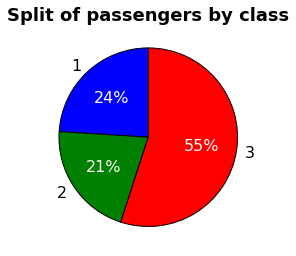

In [8]:
plt.figure(1, figsize=(4,4)) #defining a figure
plt.title('Split of passengers by class', fontsize=18, fontweight='bold') 
#getting texts and autotexts for the pie chart to better visualize the data
patches, texts, autotexts = plt.pie(prop['proportion'], autopct='%1.0f%%', labels=prop.index, startangle=90) 
#looping through text elements of the chart to format them
for i in range(len(texts)):
    autotexts[i].set_color('white')
    autotexts[i].set_fontsize(16)
    texts[i].set_fontsize(16)

The last variable I would like to analyze is the age of passengers. As this is not a binary variable, It will be better to use a histogram. As mentioned before, the age variable was also the only one with missing data. As age cannot be estimated with the dataset that I have, it will be wiser to drop all missing values. After doing this, I can analyze the data by plotting a histogram with 10-year bin widths. To make sure I do not miss any extreme values (stemming from possible problems with data), I get the max and min values first.

Max age: 80.0
Min age: 0.42
Mean age: 29.7
Median age: 28.0


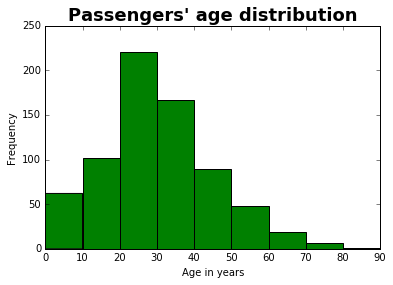

In [9]:
values = data['Age'].dropna()
print 'Max age: ' + str(values.max())
print 'Min age: ' + str(values.min())
print 'Mean age: ' + str(round(values.mean(),2))
print 'Median age: ' + str(values.median())
plt.hist(values, bins=np.arange(0, max(values) + 20, 10), color = 'green')
plt.title("Passengers' age distribution", fontsize=18, fontweight='bold') 
plt.xlabel("Age in years")
plt.ylabel("Frequency")

It is clearly visible from the graph that there was a prevalence of young people on board. The mean amount to 29.7 years, while the median is 28. Most people were aged between 20 and 40 years. The youngest person among the analyzed passengers was less than one year old, whereas the oldest was 80 years old.

<b><font size='4'>3.2. 2d analysis of chosen variables </b></font size='4'>

The following procedure is a changed version of the procedure from chapter 3.1. It is adapted to handling one variable more, as it will be necessary to split the count of survivors by gender and passenger class.

In [10]:
def counted2(dataset,by,by2,column):
    #count of one category split by another category
    s = dataset.groupby([by, by2]).count()[column]
    #renaming the column
    s.rename('count', inplace=True)
    #percentage of one category split by another category
    resultperc1 = dataset.groupby([by, by2]).agg({column: 'count'})
    resultperc2 = resultperc1.div(dataset.groupby(by).agg({column: 'count'}), level=by)
    #renaming another column
    resultperc2.rename(columns={column:'proportion'}, inplace=True)
    #returning a concatenation of a dataframe (with percentages) and a series turned into a dataframe (count)
    return pd.concat([resultperc2.round(2), pd.DataFrame(s)], axis=1)

In [11]:
gend_surv = counted2(data, 'Sex','Survived', 'PassengerId')
gend_surv

proportion  count
Sex    Survived                   
female 0               0.26     81
       1               0.74    233
male   0               0.81    468
       1               0.19    109

The following data frame shows that about one in four women did not survive the catastrophe. On the other hand, men were much less likely to live. Around one in five men survived the Titanic crash. Despite the fact that it seems clear that the proportion of survivors is higher for women than men, it is worth checking it with a statistical test.

The correct test is the test for two proportions. 

The null and alternative hypotheses will be as follows:

$$H_0: p_1 \leq p_2$$
$$H_1: p_1 > p_2$$

According to the null hypothesis, women were not more likely to survive the catastrophe than men (they were equally or less likely to do so). The alternative hypothesis states, on the other hand, that women were more likely than men to survive. To check if the null hypothesis can be rejected, a test statistic of the following form has to be calculated:

$$Z = \frac{\hat{p_1} - \hat{p_2}}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n_1} + \frac{1}{n_2})}}$$

where

$$\hat{p} = \frac{Y_1 + Y_2}{n_1 + n_2}$$

$\hat{p_1}$ and $\hat{p_2}$ are proportions of success (in this case, of surviving) for two different categories (in the example: split by gender), whereas $Y_1$ and $Y_2$ are the absolute numbers of survivors in the examined dataset. Consequently, $n_1$ and $n_2$ are the absolute numbers of passengers, as split by gender.

The procedure <i>zprop</i> has been constructed to accommodate for any data generated with <i>counted2</i> procedure. It is with this procedure that we will calculate the Z statistic.

In [12]:
def zprop(data, cat1, cat2, count):
    #proportion difference
    diff = data.loc[cat1].iloc[1,0] - data.loc[cat2].iloc[1,0]
    #count of all people on board
    all = data[count].sum()
    #and split by gender
    n1 = data[count].loc[cat1].sum()
    n2 = data[count].loc[cat2].sum()
    #people surviving
    succ = data[count][1] + data[count][3]
    pdash = 1.0*succ/all
    #z statistic
    z =  diff/np.sqrt(pdash*(1-pdash)*(1.0/n1 + 1.0/n2))
    return z.round(2)

print zprop(gend_surv, 'female', 'male', 'count')

16.13


As we can see, the z-stat equals 16.13. If we compare this to a critical value for a one-tailed case $z_c (\alpha = 0.05) = 1.64 $, we can see that the calculated z falls well within the critical region. As a result, $H_0$ has to be rejected in favour of the alternative hypothesis. Thus, it was calculated that women appeared to be more likely to survive the Titanic crash.

The second part of 2d analysis concentrates around the question, whether or not passengers from all classes were equally likely to survive the catastrophe. It might make sense that some groups (e.g. richer people) were more priviliged and could hope for a better chance of rescue. A set of statistical hypotheses was prepared:

$$H_0: p_1 = p_2 = p_3$$
$$H_1: p_1 \neq p_2 \neq p_3$$

The null hypothesis states that the proportion of survivors is equal in all three groups, whereas the alternative hypothesis states, that proportions are not equal with one another. To test the hypothesis, a chi-square test needs to be performed. By using the stats module from scipy, it is possible to do this by just defining arrays and then performing a stats.chi2_contingency function on the prepared data.

In [13]:
class_surv = counted2(data, 'Pclass','Survived', 'PassengerId')
cont_table = np.array([[class_surv['count'].iloc[0], class_surv['count'].iloc[1]], \
                [class_surv['count'].iloc[2], class_surv['count'].iloc[3]], \
                [class_surv['count'].iloc[4], class_surv['count'].iloc[5]]])
chi2, p, dof, expected = stats.chi2_contingency(cont_table)
print class_surv
print ' '
print "Chi-stat: " + str(chi2) +', ' + "p-value: " + str(p)

                 proportion  count
Pclass Survived                   
1      0               0.37     80
       1               0.63    136
2      0               0.53     97
       1               0.47     87
3      0               0.76    372
       1               0.24    119
 
Chi-stat: 102.888988757, p-value: 4.5492517113e-23


As we can see, the chi statistic is quite large, and the corresponding p-value is extremely small (practically close to 0). Because of p-value being exceptionally small, we can assume that the null hypothesis will be rejected at all $\alpha$ levels. Thus, at least two out of three proportions differ significantly. A possible further step would be to make pairwise tests to know exactly who (passengers of which class) was more likely to survive.

The last piece of analysis I would like to prepare tests whether the mean age for the survivors was significantly different from the mean age of non-survivors. It might be inferred that younger people were more likely to get rescued because they could find their way to lifeboats more quickly. On the other hand, older people might have been given quicker access to lifeboats because of gentelmanly manners still ubiquitous at the beginning of the 20th century. As any hypothesis might be valid, it will better to perform a two-tailed test just to check whether the mean ages differ between survivors and non-survivors. To do this, a set of hypotheses will be checked.
$$H_0: \mu_1 = \mu_2$$
$$H_1: \mu_1 \neq \mu_2$$
The null hypothesis states that the mean age of survivors and the mean age of non-survivors is equal. The alternative hypothesis states that the means are not equal.

To perform the test, I will take a slice of the original dataset with just two columns, then divide it into two separate dataframes with one devoted only to survivors and the other to non-survivors. Missing data concerning age will be naturally dropped. 

In [14]:
#slicing the dataset
dataage = data.ix[:,['Survived', 'Age']]
#splitting into two separated dataframe objects (and dropping missing values)
dxsurv = dataage.loc[dataage['Survived'] == 1].dropna()
dxnsurv = dataage.loc[dataage['Survived'] == 0].dropna()
#calculating means
print 'Mean age of survivors: ' + str(round(dxsurv['Age'].mean(),2))
print 'Mean age of non-survivors: ' + str(round(dxnsurv['Age'].mean(),2))

Mean age of survivors: 28.34
Mean age of non-survivors: 30.63


As we can see, the average age for a survivor (the dataframe <i> dxs</i>) is 28.34. On the other hand, the average age for a survivor (the dataframe <i> dxns</i>) is 30.63. To better visualize how the age distribution for each category looks like, a boxplot will be generated (blue dots represent outliers).

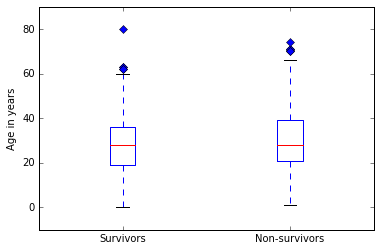

In [15]:
#boxplot for each category
boxdata = [dxsurv['Age'], dxnsurv['Age']]
plt.boxplot(boxdata, 0, 'gD')
axes = plt.gca()
axes.set_ylim([-10,90])
plt.xticks([1,2], ['Survivors', 'Non-survivors'])
plt.ylabel('Age in years')

As shown with the plot above, there are a few outliers for each category. However, given that the outliers fall within what we can consider acceptable age for the purpose of the analysis (and there are not many of them compared to the total number of passengers, as produced by the code below), they will not be omitted in the analysis. 

In [16]:
#checking outliers
top_points1 = plt.boxplot([dxsurv['Age']], 0, "gD")["fliers"][0].get_data()[1]
top_points2 = plt.boxplot([dxnsurv['Age']], 0, "gD")["fliers"][0].get_data()[1]
print top_points1, ' ', 'Number of outliers: ' + str(len(top_points1))
print 'Number of observations for survivors with known age: ' + str(len(dxsurv['Age']))
print top_points2, ' ', 'Number of outliers: ' + str(len(top_points2))
print 'Number of observations for non-survivors with known age: ' + str(len(dxnsurv['Age']))
#a line below so that above boxplots are not plotted
plt.close()

[ 63.  63.  62.  80.  62.]   Number of outliers: 5
Number of observations for survivors with known age: 290
[ 71.   70.5  71.   70.   70.   74. ]   Number of outliers: 6
Number of observations for non-survivors with known age: 424


Finally, a t-test will be performed using scipy package.

In [17]:
comp_means = stats.ttest_ind(dxsurv['Age'], dxnsurv['Age'])
print comp_means

Ttest_indResult(statistic=-2.0666869462538102, pvalue=0.039124654013482488)


A t-test performed with scipy package gives $t =$ -2.07 and a p-value of ~0.04. We can reject the null hypothesis at the level of $\alpha$ = 0.05, as the <br> $t_c$(0.05, df=712) = 1.963 (but not at $\alpha$ = 0.01, with $t_c$(0.01, df=712) = 2.583). At $\alpha$ = 0.05 the average age of a survivor is significantly different from the average age of a non-survivor.

<b><font size='5'>4. Conclusion</b><font size='5'>

The following analysis tried to identify whether there are statistically significant differences in the demographics of survivors and non-survivors of the Titanic crash. With the help of several statistical tests, it was concluded that gender appears to play a major role in determining one's survival chances, with women more likely to live a long and happy life. It was also found out that the proportion of survivors seems to differ from one passenger class to another. Finally, at some $\alpha$ levels, age appears to play a role in the survival chances. Of course, it is important to remember that correlation does not imply causation, but the analysis above still helps to understand who, faced with a shortage of lifeboats and scarce time for evacuation, was more likely to live further.

<b><font size='5'>5. Bibliography & links</b><font size='5'>

1. https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic
 
2. http://matplotlib.org/examples/pylab_examples/     #examples of pie charts and box plots
 
3. https://onlinecourses.science.psu.edu/stat414/node/268     #comparing two proportions
 
4. https://web.stanford.edu/~kcobb/hrp259/lecture12.ppt     #comparing three and more proportions
 
5. https://stackoverflow.com     #coding problems

6. http://www.uic.edu.hk/~dennisc/statistics/Z-table.png    #z table

7. http://www.danielsoper.com/statcalc/calculator.aspx?id=10    #t values calculator 